In [122]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns

from utils.load_data import load_data
from utils.preprocessing import preprocess_data
from models.BaseModel import BaseModel

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
SEED = 0
EPS = 1e-6
VALID_PROPORTION = 0.2
CONFIDENCE_LEVEL = 0.95

In [124]:
data = load_data()

X, y, y_mean, y_std = preprocess_data(data=data, epsilon=EPS)

countries = data['country'].to_frame().assign(date=X['date'])

X

,date,Expense_average,Research_and_development_average,Capital_expenditure_average,Business_average,Cost_average,Tax_average,Financial_capital_average,Investment_average,Gross_domestic_product_average,...,Artificial_intelligence_average,International_Financial_Reporting_Standards_average,Employment_average,country_Canada,country_Germany,country_Japan,country_Korea,country_Switzerland,country_United Kingdom,country_United States
616,-1.771126,-1.060998,2.871241,-1.696290,1.582391,-0.732737,-0.290201,-0.604001,-0.078562,0.186376,...,-0.395035,-1.710910,1.689417,2.404072,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,-0.415202
619,-1.727217,-1.522179,2.666916,-1.696290,1.367863,-1.087844,-1.376563,-0.604001,-0.269472,-0.894918,...,-0.453614,-1.710910,1.689417,2.404072,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,-0.415202
622,-1.683309,-1.522179,2.799126,-1.696290,1.718909,-1.087844,-1.678330,-0.604001,-0.396745,-0.390314,...,-0.453614,-1.710910,1.614286,2.404072,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,-0.415202
625,-1.639878,-1.573422,0.719815,-1.696290,0.750281,-1.138574,-1.617977,-0.604001,-0.587654,0.042203,...,-0.395035,-1.710910,0.787848,2.404072,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,-0.415202
628,-1.596925,-0.958513,2.594801,0.031036,1.647399,-0.884926,0.071919,-0.237990,0.048711,0.258462,...,-0.453614,-1.710910,1.952374,2.404072,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,-0.415202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,1.540597,1.808578,0.767892,2.520419,1.036319,2.361764,1.942876,-0.375244,1.385078,2.132705,...,2.182437,-0.598496,-0.414243,-0.415202,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,2.404072
6877,1.584506,0.117578,-0.073448,1.707559,0.516251,2.361764,-0.169494,-0.451496,0.557803,0.330548,...,3.119700,-0.783898,-0.526940,-0.415202,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,2.404072
6880,1.628414,1.347396,0.827987,2.063185,0.906302,2.057387,-0.169494,-0.451496,1.066895,2.348963,...,3.119700,-0.459444,-0.564505,-0.415202,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,2.404072
6883,1.671845,0.732487,-0.073448,1.555148,0.483746,1.803739,0.192626,-0.298992,1.066895,1.556015,...,3.881226,-0.830249,0.712717,-0.415202,-0.415202,-0.365754,-0.412192,-0.415202,-0.415202,2.404072


In [125]:
y

616    -1.110615
619    -1.066959
622    -1.025349
625    -0.986653
628    -0.943852
          ...   
6874    2.464404
6877    2.521690
6880    2.626594
6883    2.690385
6886    2.755538
Name: GDP, Length: 550, dtype: float64

In [126]:
n_valid = int(len(X) * VALID_PROPORTION)

X_train, y_train = X[:-n_valid], y[:-n_valid]
X_valid, y_valid = X[-n_valid:], y[-n_valid:]
country_train, country_valid = countries.iloc[:-n_valid], countries.iloc[-n_valid:]


In [127]:
model = BaseModel(seed=SEED)

model.fit(X_train, y_train)

# Predict on training and validation data
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)

# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
print(f"Training MSE: {mse_train:.4f}")
print(f"Validation MSE: {mse_valid:.4f}")

Training MSE: 0.0017
Validation MSE: 0.3090


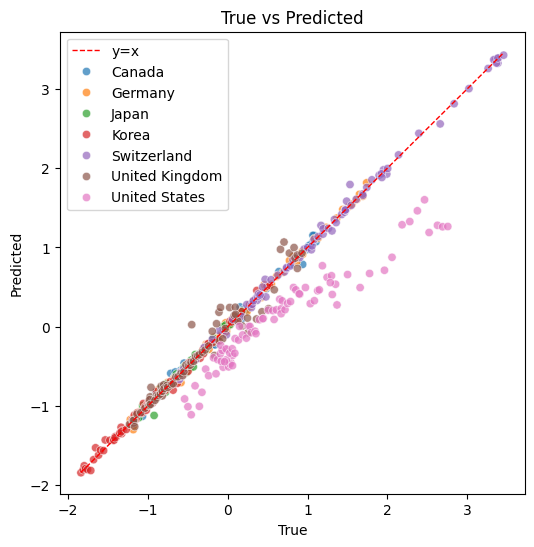

In [128]:
# Associate the result by country
y_pred_valid_country = pd.DataFrame({'date': country_valid['date'].values, 'country': country_valid['country'].values, 'y_pred': y_pred_valid, 'y_true': y_valid})
y_pred_train_country = pd.DataFrame({'date': country_train['date'].values, 'country': country_train['country'].values, 'y_pred': y_pred_train, 'y_true': y_train})

# Put together the train and the validation set
predictions = pd.concat([y_pred_train_country, y_pred_valid_country])

# Melting the dataframe for better plotting
predictions_melted = predictions.melt(
    id_vars=["date", "country"], value_vars=["y_pred", "y_true"],
    var_name="Type", value_name="Value"
)

predictions

# plot true (x) vs predicted (y) values
plt.figure(figsize=(6, 6))
# line
plt.plot([np.min(predictions['y_true']), np.max(predictions['y_true'])], [np.min(predictions['y_true']), np.max(predictions['y_true'])], color='red', linewidth=1, linestyle='--', label='y=x')
sns.scatterplot(x='y_true', y='y_pred', data=predictions, hue='country', alpha=0.7)
plt.title('True vs Predicted')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [129]:
# Function to plot data with confidence intervals for the selected country
def plot_by_country_with_confidence(selected_country):
    filtered_data = predictions_melted[predictions_melted["country"] == selected_country]
    cutoff_date = filtered_data['date'].quantile(1-VALID_PROPORTION)

    plt.figure(figsize=(12, 6))
    
    # Plot predictions and true values
    sns.lineplot(
        data=filtered_data,
        x="date", y="Value", hue="Type", style="Type", markers=True, dashes=False
    )

    # Add a vertical line to indicate where validation starts
    plt.axvline(x=cutoff_date, color='red', linestyle='--', label=f'Validation Start ({(1-VALID_PROPORTION)*100:.0f}%)')
    
    # Enhancing the plot
    plt.title(f"Prediction vs True Values for {selected_country}")
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.legend(title="Legend")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create a dropdown widget for selecting the country
countries = predictions["country"].unique()
dropdown = widgets.Dropdown(
    options=countries,
    value=countries[0],
    description='Country:'
)

# Use the interact function to link the dropdown with the updated plot function
interact(plot_by_country_with_confidence, selected_country=dropdown)

interactive(children=(Dropdown(description='Country:', options=('Canada', 'Germany', 'Japan', 'Korea', 'Switze…

<function __main__.plot_by_country_with_confidence(selected_country)>

In [130]:
# OLD

import shap

PLOT_SHAP = False

if PLOT_SHAP:
    explainer = shap.KernelExplainer(model.predict, shap.kmeans(X_train, 20))
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values, X_test)
